In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.lines import Line2D
from scipy import stats

In [2]:
spec_df = pd.read_feather('/home/billault/mcmc_data/target_more_bimodal_spectra_from_single_edr1e-3.feather')

2 [152 164]
1
1


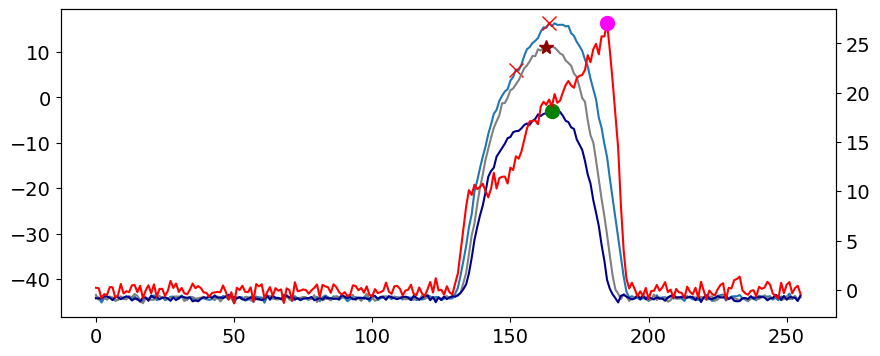

In [36]:
i =1

spec = spec_df['spectra_X'].iloc[i].copy()
pp = signal.find_peaks(spec,height=-30, distance=12)[0]
print(len(pp),pp)

spec1 = spec_df['spectra_Ka'].iloc[i].copy()
pp1 = signal.find_peaks(spec1, height=-30)[0]#, distance=12)[0]
if len(pp1) > 2:
    pp1 = signal.find_peaks(spec1, height=-30, distance=13)[0]
print(len(pp1))

spec2 = spec_df['spectra_W'].iloc[i].copy()
pp2 = signal.find_peaks(spec2, height=-30,distance=12)[0]
if len(pp2) > 2:
    pp2 = signal.find_peaks(spec2, height=-30, distance=13)[0]
print(len(pp2))

plt.figure(figsize=(10,4))
plt.plot(spec)
plt.plot(pp, spec[pp], "x",color='red',ms=10)
plt.plot(spec1, color='gray')
plt.plot(pp1, spec1[pp1], "*",color='darkred',ms=10)
plt.plot(spec2,color='darkblue')
plt.plot(pp2, spec2[pp2], "o",color='green',ms=10)
axy = plt.gca().twinx()
axy.plot(spec[:]-spec2[:],c='r')
pp3 = signal.find_peaks(spec-spec2, height=3,distance=12,width=4)[0]
axy.plot(pp3, spec[pp3]-spec2[pp3], "o",color='magenta',ms=10)

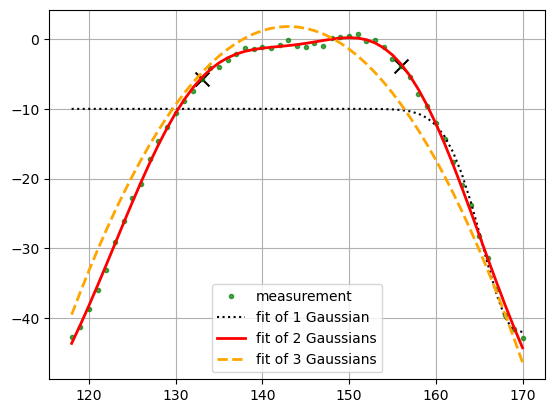

In [32]:
import gaussian
i = 6
spec = spec_df['spectra_X'].iloc[i].copy()

guess1 = [10, 170, 5, -45]
guess2 = [10, 170, 5, 10, 150, 5,-45]
guess3 = [10, 120, 5, 10, 140, 5, 10, 180, 5,-45] 
v = np.arange(0,256)

i_fit = np.where(spec>spec.min()+2.23)[0]#(v>129) & (v<195))[0]
nt = 0
dataX = v[i_fit]
dataY = spec[i_fit]
# tol = 1e-5

fit_res = gaussian.fit_gaussian(dataX,dataY,guess1,guess2,guess3,plot=True)
peaks_2gaussian = np.int64(np.array(fit_res['centers'][1]))
plt.scatter(peaks_2gaussian,spec[peaks_2gaussian], color='k', s=100, marker='x')

In [3]:
def spectral_skewness(spec,vel_array = np.linspace(-5,5,256,endpoint=True)):
    spec_lin = 10**(spec/10)
    weights = spec_lin/np.sum(spec_lin)
    mean = np.sum(vel_array*weights)
    var = np.sum((vel_array-mean)**2*weights)
    skew = np.sum((vel_array-mean)**3*weights)/var**(3/2)
    return skew    


In [4]:
peaks0 = []
peaks1 = []
peaks2 = []
peaks3 = []
prominences0 = []
prominences1 = []
prominences2 = []
prominences3 = []
widths0 = []
widths1 = []
widths2 = []
widths3 = []
skew0 = []
skew1 = []
skew2 = []

for i in range(13):
    spec = spec_df['spectra_X'].iloc[i].copy()
    pp = signal.find_peaks(spec, height=-30, distance=12)[0]
    peaks0.append(pp)
    prominences0.append(np.sort(signal.peak_prominences(spec, pp)[0]))
    widths0.append(signal.peak_widths(spec, pp)[0])
    skew0.append(spectral_skewness(spec))

    spec1 = spec_df['spectra_Ka'].iloc[i].copy()
    pp1 = signal.find_peaks(spec1, height=-30,distance=12)[0]
    # pp1 = signal.find_peaks(spec1, height=-30)[0]
    # if len(pp1) > 2:
    #     pp1 = signal.find_peaks(spec1, height=-30, distance=7)[0]
    if len(pp1) > 2:
        pp1 = signal.find_peaks(spec1, height=-30, distance=13)[0]
    peaks1.append(pp1)
    prominences1.append(np.sort(signal.peak_prominences(spec1, pp1)[0]))
    widths1.append(signal.peak_widths(spec1, pp1)[0])
    skew1.append(spectral_skewness(spec1))

    spec2 = spec_df['spectra_W'].iloc[i].copy()
    pp2 = signal.find_peaks(spec2, height=-30, distance=12)[0]
    # pp2 = signal.find_peaks(spec2, height=-30, distance=8)[0]
    # if len(pp2)>2:
    #     pp2 = signal.find_peaks(spec2, height=-30, distance=10)[0]
    # if len(pp2)>2:
    #     pp2 = signal.find_peaks(spec2, height=-30, distance=12)[0]
    if len(pp2) > 2:
        pp2 = signal.find_peaks(spec2, height=-30, distance=12, threshold=.3)[0]
    peaks2.append(pp2)
    prominences2.append(np.sort(signal.peak_prominences(spec2, pp2)[0]))
    widths2.append(signal.peak_widths(spec2, pp2)[0])
    skew2.append(spectral_skewness(spec2))

    spec3 = spec-spec2
    pp3 = signal.find_peaks(spec3, height=3,distance=12,width=4)[0]
    peaks3.append(pp3)
    prominences3.append(np.sort(signal.peak_prominences(spec3, pp3)[0]))
    widths3.append(signal.peak_widths(spec3, pp3)[0])
# peaks1[5] = peaks1[5][1:]
# prominences1[5] = prominences1[5][1:]
# widths1[5] = widths1[5][1:]

In [5]:
# prominences = []
peaks = []
freq = []

for i, p in enumerate(peaks0):
    if len(p)==2:
        peaks.append(p)
        # prominences.append(prominences0[i])
        freq.append('X')
    elif len(peaks1[i])==2:
        peaks.append(peaks1[i])
        freq.append('Ka')
        # prominences.append(prominences1[i])
    else:
        peaks.append(peaks2[i])
        freq.append('W')
        # prominences.append(prominences2[i])

        

In [21]:
for i, pp in enumerate(prominences2):
    if len(pp)<2:
        prominences2[i] = np.array([0,pp[0]])

for i, pp in enumerate(prominences1):
    if len(pp)<2:
        prominences1[i] = np.array([0,pp[0]])

for i, pp in enumerate(prominences0):
    if len(pp)<2:
        prominences0[i] = np.array([0,pp[0]])

prominences0 = np.array(prominences0)
prominences1 = np.array(prominences1)
prominences2 = np.array(prominences2)

In [22]:
prominences1


array([[ 2.69509681, 45.16730276],
       [ 0.        , 56.17402171],
       [ 0.        , 57.88506926],
       [ 7.66011566, 47.48207412],
       [ 7.0749644 , 64.66978612],
       [ 0.        , 43.46627516],
       [ 0.        , 44.47513862],
       [ 0.38526174, 43.65305008],
       [ 0.        , 47.65793594],
       [ 0.23847747, 64.56822406],
       [ 0.81318498, 68.33701227],
       [ 7.69816858, 44.11113266],
       [ 1.85036217, 56.91531468]])

In [52]:
mean_ratios_1 = 1/3*(prominences0[:,0]/prominences0[:,1] + prominences1[:,0]/prominences1[:,1]+prominences2[:,0]/prominences2[:,1])
mean_ratios_2 = np.dstack((prominences0,prominences1,prominences2)).mean(axis=2)[:,0]/np.dstack((prominences0,prominences1,prominences2)).mean(axis=2)[:,1]

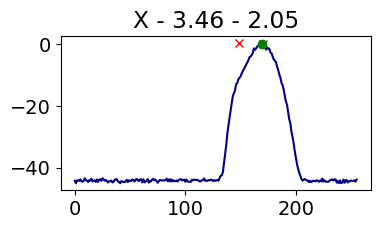

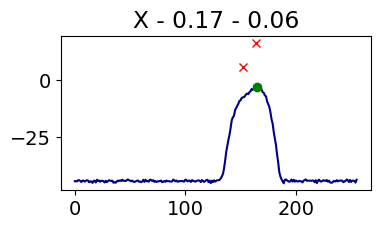

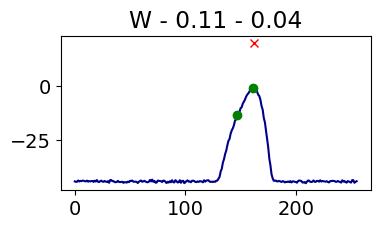

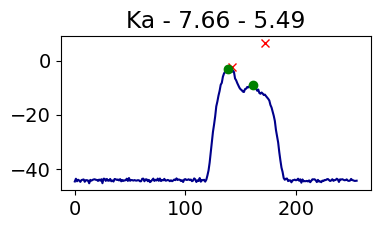

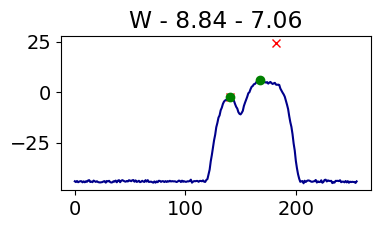

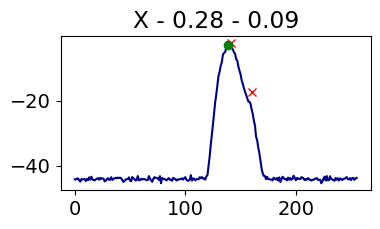

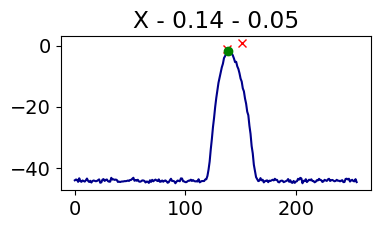

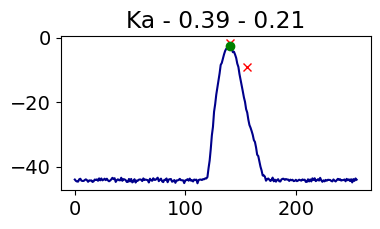

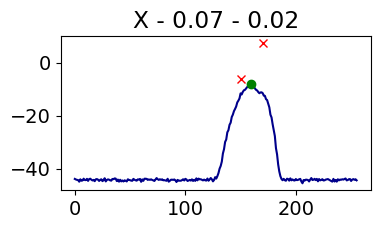

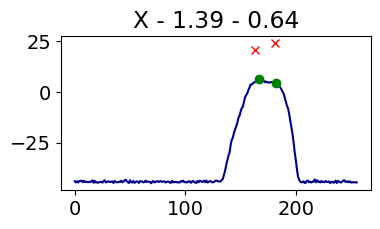

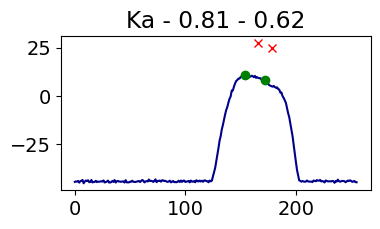

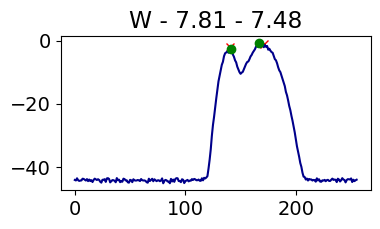

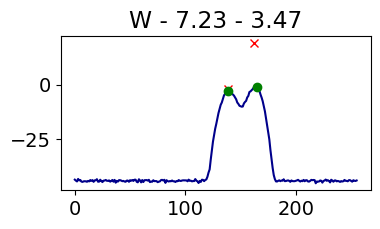

In [53]:
prom_num = []
prom_num_w_3 = []
widths_num = []
widths_num_w_3 = []

for i in range(13):
    spec = spec_df['spectra_X'].iloc[i].copy()
    spec1 = spec_df['spectra_Ka'].iloc[i].copy()
    spec2 = spec_df['spectra_W'].iloc[i].copy()

    plt.figure(figsize=(4,2))
    # plt.plot(spec)
    plt.plot(peaks0[i], spec[peaks0[i]], "x",color='red')
    # plt.plot(spec1, color='gray')
    # plt.plot(peaks1[i], spec1[peaks1[i]], "*",color='darkred')
    plt.plot(spec2,color='darkblue')
    plt.plot(peaks2[i], spec2[peaks2[i]], "o",color='green')

    if len(prominences0[i])>1:
        prom0 = '%.02f'%prominences0[i].min()
        prom0_num = prominences0[i].min()
        imin = prominences0[i].argmin()
        widths0_num = widths0[i][imin]
    else:
        prom0 = '-'
        prom0_num = 0
        widths0_num = 0
    if len(prominences1[i])>1:
        prom1 = '%.02f'%prominences1[i].min()
        prom1_num = prominences1[i].min()
        imin = prominences1[i].argmin()
        widths1_num = widths1[i][imin]
    else:
        prom1 = '-'
        prom1_num = 0
        widths1_num = 0
    if len(prominences2[i])>1:
        prom2 = '%.02f'%prominences2[i].min()
        prom2_num = prominences2[i].min()
        imin = prominences2[i].argmin()
        widths2_num = widths2[i][imin]
    else:
        prom2 = '-'
        prom2_num = 0
        widths2_num = 0

    if len(prominences3[i])>1:
        prom3 = '%.02f'%prominences3[i].min()
        prom3_num = prominences3[i].min()
        imin = prominences3[i].argmin()
        widths3_num = widths3[i][imin]
    else:
        prom3 = '-'
        prom3_num = 0
        widths3_num = 0

    prom_num.append([prom0_num, prom1_num, prom2_num])
    prom_num_w_3.append([prom0_num, prom1_num, prom2_num,prom3_num])
    widths_num.append([widths0_num, widths1_num, widths2_num])
    widths_num_w_3.append([widths0_num, widths1_num, widths2_num,widths3_num])

    plt.title('X: %s, Ka: %s, W:%s'%(prom0,prom1,prom2))
    if max(prom0_num, prom1_num, prom2_num) == prom0_num:
        label = 'X'
    elif max(prom0_num, prom1_num, prom2_num) == prom1_num:
        label = 'Ka'
    else:
        label = 'W'
    plt.title(label+ ' - %.02f - %.02f'%(max(prom0_num, prom1_num, prom2_num), np.mean((prom0_num, prom1_num, prom2_num))))

In [54]:
skew = np.array([skew0, skew1, skew2]).T

prom_num = np.array(prom_num)
widths_num = np.array(widths_num)
distances = np.array(peaks)[:,1]-np.array(peaks)[:,0]
prom_num_w_3 = np.array(prom_num_w_3)
widths_num_w_3 = np.array(widths_num_w_3)

prom_mean0 = prom_num.mean(axis=1)
skew_mean = skew.mean(axis=1)
skew_max = skew.max(axis=1)
skew_min = skew.min(axis=1)
prom_mean = prom_num.mean(axis=1)#**2*np.min(np.abs(skew),axis=1)#*distances
prom_mean_w_3 = 1/4*(np.sum(prom_num_w_3[:,:-1])+.25*prom_num_w_3[:,-1])
# prom_mean_w_3 = prom_num_w_3.mean(axis=1)
prom_max = prom_num.max(axis=1)
# prom_mean_ordered, ordered_inds = np.unique(prom_mean,return_index=True)
prom_mean_ordered, ordered_inds = np.unique(mean_ratios_1,return_index=True)

0 8
1 2
2 6
3 1
4 5
5 7
7 9
8 0
9 12
10 3
11 4
12 11


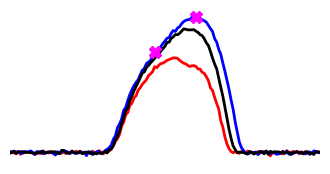

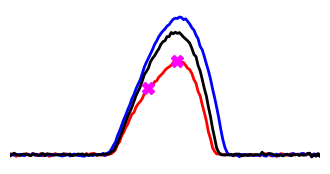

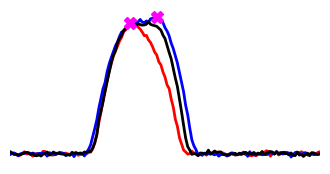

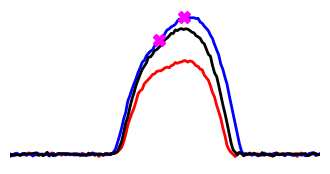

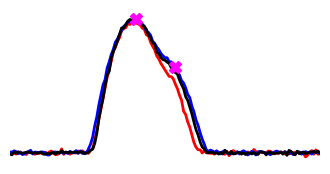

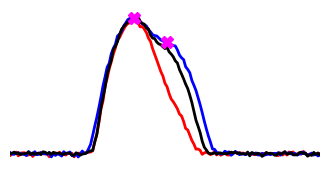

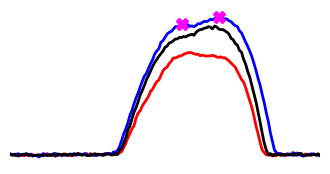

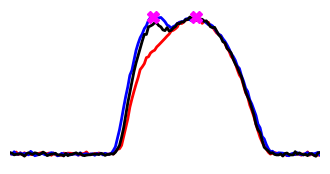

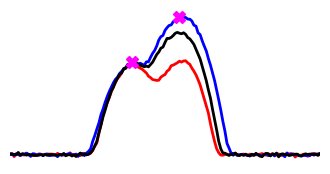

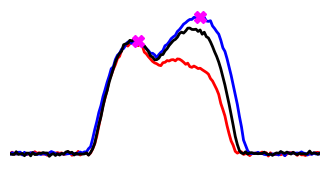

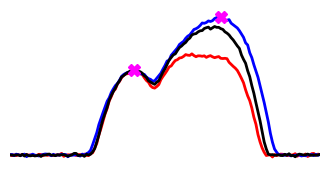

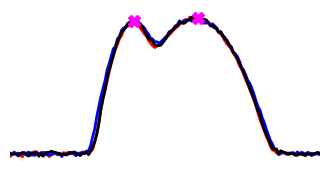

In [9]:
for j, i in enumerate(ordered_inds):
    if i==10:
        continue
    print(j,i)
    plt.figure(figsize=(4,2))
    plt.plot(spec_df['spectra_W'].iloc[i],color='red',lw=2)
    plt.plot(spec_df['spectra_X'].iloc[i],color='blue',lw=2)
    plt.plot(spec_df['spectra_Ka'].iloc[i], color='k',lw=2)
    plt.xlim(80,230)
    if len(peaks0[i])==2:    
        plt.plot(peaks0[i], spec_df['spectra_X'].iloc[i][peaks0[i]], "X",color='magenta',ms=8)
    elif len(peaks1[i])==2:
        plt.plot(peaks1[i], spec_df['spectra_Ka'].iloc[i][peaks1[i]], "X",color='magenta',ms=8)
    else:
        plt.plot(peaks2[i], spec_df['spectra_W'].iloc[i][peaks2[i]], "X",color='magenta',ms=8)
    # plt.title('%.02f'%prom_mean[i])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.gcf().savefig('figures_small_spectra_w_peaks/peaks_order%i_orig%i.png'%(j,i), bbox_inches='tight', dpi=300,transparent=True)
    

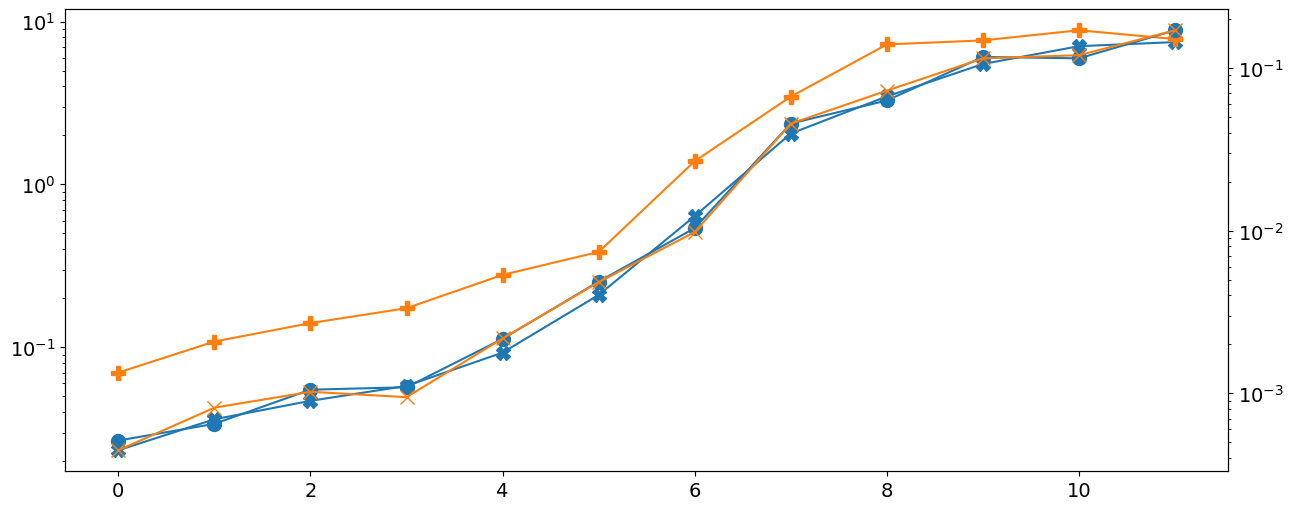

In [34]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15,6))
plt.plot(prom_mean[ordered_inds[ordered_inds!=10]],'-X',ms=10)
plt.plot(prom_max[ordered_inds[ordered_inds!=10]],'-P',ms=10)
plt.yscale('log')

axy = plt.gca().twinx()
axy.plot(mean_ratios_2[ordered_inds[ordered_inds!=10]],'-o',ms=10)
axy.plot(mean_ratios_1[ordered_inds[ordered_inds!=10]],'-x',ms=10)
# axy.plot(prom_mean_w_3[ordered_inds[ordered_inds!=10]],'-P',c='r',ms=10)
axy.set_yscale('log')
# plt.gcf().savefig('figures_small_spectra_w_peaks/prominences.png', bbox_inches='tight', dpi=300)

In [36]:
df = {}
df['ks']= pd.read_feather('../mcmc_2/ks_stats_bimodal_from_hist_list.feather')
df['wass'] = pd.read_feather('../mcmc_2/wasserstein_stats_bimodal_from_hist_list.feather')
df['wass_nor'] = pd.read_feather('../mcmc_2/wasserstein_stats_bimodal_from_hist_list_normalized.feather')
df['js'] = pd.read_feather('../mcmc_2/jensen_shannon_stats_bimodal_from_hist_list.feather')
df['bat'] = pd.read_feather('../mcmc_2/battacharyya_stats_bimodal_from_hist_list.feather')
df['entropy'] = pd.read_feather('../mcmc_2/entropy_stats_bimodal_from_hist_list.feather')

In [37]:
df2 = pd.DataFrame([df[metric]['beta_area_size_2'] for metric in df.keys()]).reset_index(drop=True).T
df2.rename(columns={i:metric for i,metric in enumerate(df.keys())}, inplace=True)
df2.style.background_gradient()#axis=None)
# df2.drop(10, inplace=True)
# df2=df2.reset_index(drop=True)
plt.rcParams["image.cmap"] = 'turbo'
df2.iloc[ordered_inds[ordered_inds!=10]].style.background_gradient(cmap=None,axis=0)

,ks,wass,wass_nor,js,bat,entropy
8,0.035357,0.014814,0.092769,0.058173,0.996544,0.012399
2,0.061354,0.026434,0.165541,0.083254,0.992838,0.024703
1,0.123480,0.049489,0.310394,0.121691,0.984912,0.054070
6,0.047607,0.015270,0.093925,0.055441,0.996910,0.011724
5,0.044969,0.019064,0.117257,0.054694,0.996966,0.011188
7,0.044290,0.014430,0.088759,0.055907,0.996858,0.012064
9,0.025215,0.008570,0.051235,0.056574,0.996676,0.014117
0,0.023952,0.007980,0.051503,0.040743,0.998283,0.007574
12,0.018640,0.005527,0.033994,0.026886,0.999270,0.002846
3,0.012018,0.005862,0.036054,0.026091,0.999314,0.002631


In [38]:
var_list = {'Deff':{'color':'r', 'title':'$D_{eff}$'},
            'logM0': {'color':'brown', 'title':'log($N_T$)'},
            'b_mass_size': {'color':'orange', 'title':'$b_{m}$'},
            'mu':{ 'color':'g', 'title':'$\mu$'},
            'beta_area_size': {'color':'purple', 'title':'$\\beta_{a}$'},
}
suffix = '_nomubeta'#_orderbD_meansmax'
means = {}
for key in df.keys():
    means[key] = df[key].mean(axis=1).to_numpy()

maxs = {}
for key in df.keys():
    maxs[key] = df[key].max(axis=1).to_numpy()

mins = {}
for key in df.keys():
    mins[key] = df[key].min(axis=1).to_numpy()
stats_per_var = {}
for var in var_list:
    stats_per_var[var] = {}
    for key in df.keys():
        stats_per_var[var][key] = np.vstack((df[key][var].values, df[key][var+'_2'].values)).T

max_per_var = {}
min_per_var = {}
for var in var_list:
    max_per_var[var] = {}
    min_per_var[var] = {}
    for key in df.keys():
        max_per_var[var][key] = stats_per_var[var][key].max(axis=1)
        min_per_var[var][key] = stats_per_var[var][key].min(axis=1)


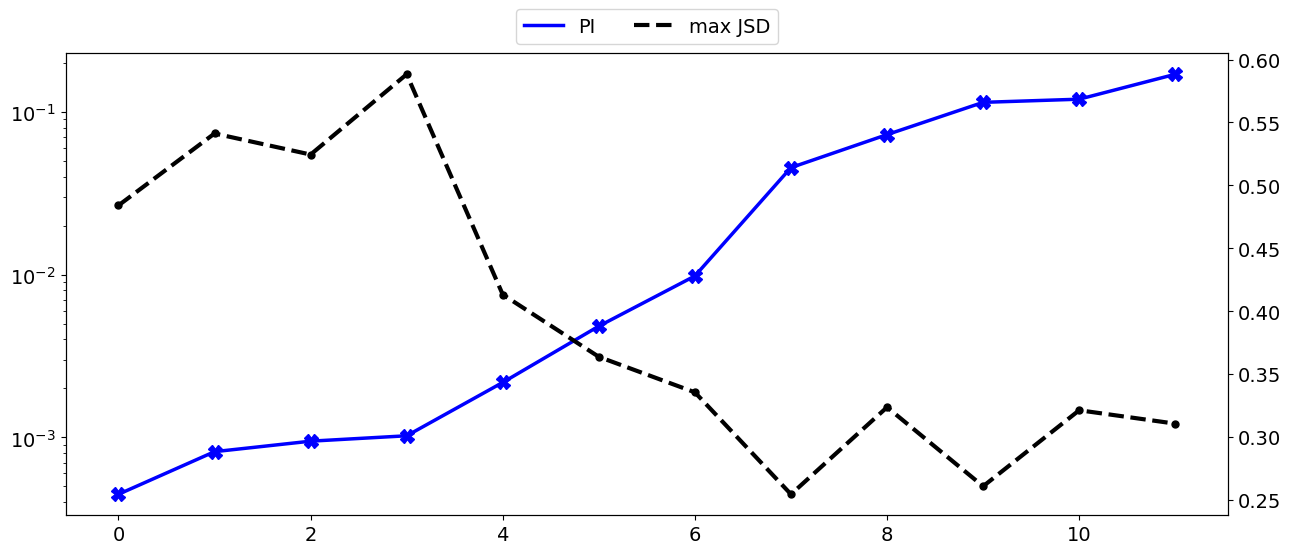

In [60]:
metric = 'js'
vars = ['Deff', 'b_mass_size']

# ordered_inds = np.argsort(np.mean(np.vstack((max_per_var['b_mass_size'][metric], max_per_var['Deff'][metric])),axis=0))
means_metric = np.array([max_per_var[var][metric] for var in vars]).max(axis=0)
# ordered_inds = np.argsort(means_metric)[::-1]

plt.rcParams.update({'font.size': 14})

fig,ax = plt.subplots(figsize=(15,6))

ax.plot(mean_ratios_1[ordered_inds[ordered_inds!=10]],'-X',ms=10,lw=2.5,color='blue')
# ax.plot(prom_mean[ordered_inds[ordered_inds!=10]],'-X',ms=10,lw=2.5,color='blue')
# ax.grid()
# axyy = ax.twinx()
# axyy.plot(means[metric][ordered_inds[ordered_inds!=10]],'-o',lw=3,color='k',ms=5)
# axyy.plot(maxs[metric][ordered_inds[ordered_inds!=10]],'-o',lw=3,color='k',ms=5)
axy = ax.twinx()
axy.plot(means_metric[ordered_inds[ordered_inds!=10]],'--o',color='k',ms=5, label=var, lw=3)

# axyy.set_ylabel('Jensen-Shannon')
# axyy.invert_yaxis()
# for var in vars:
    # axy = ax.twinx()
    # axy.plot(max_per_var[var][metric][ordered_inds[ordered_inds!=10]],'--',color=var_list[var]['color'],ms=10)
    # axy.set_yticks([])
    # axy.invert_yaxis()
ax.set_yscale('log')
# ax.set_ylim(2e-2,50)

lines = [Line2D([0], [0], label='PI', linestyle='-',color='blue', lw=2.5),Line2D([0], [0], label='max JSD', linestyle='--',color='k', lw=3) ] 
# +[Line2D([0], [0], label=var_list[var]['title'], linestyle='--',color=var_list[var]['color'], lw=1) for var in vars]
ax.legend(handles=lines,bbox_to_anchor = (.5,1),loc='lower center',ncol = 2)

fig.savefig('figures_small_spectra_w_peaks/prominences_ratio_%s%s_mean_novars.png'%(metric,suffix), bbox_inches='tight', dpi=300)


In [56]:
ordered_inds

array([ 8,  2,  1,  6,  5,  7, 10,  9,  0, 12,  3,  4, 11])

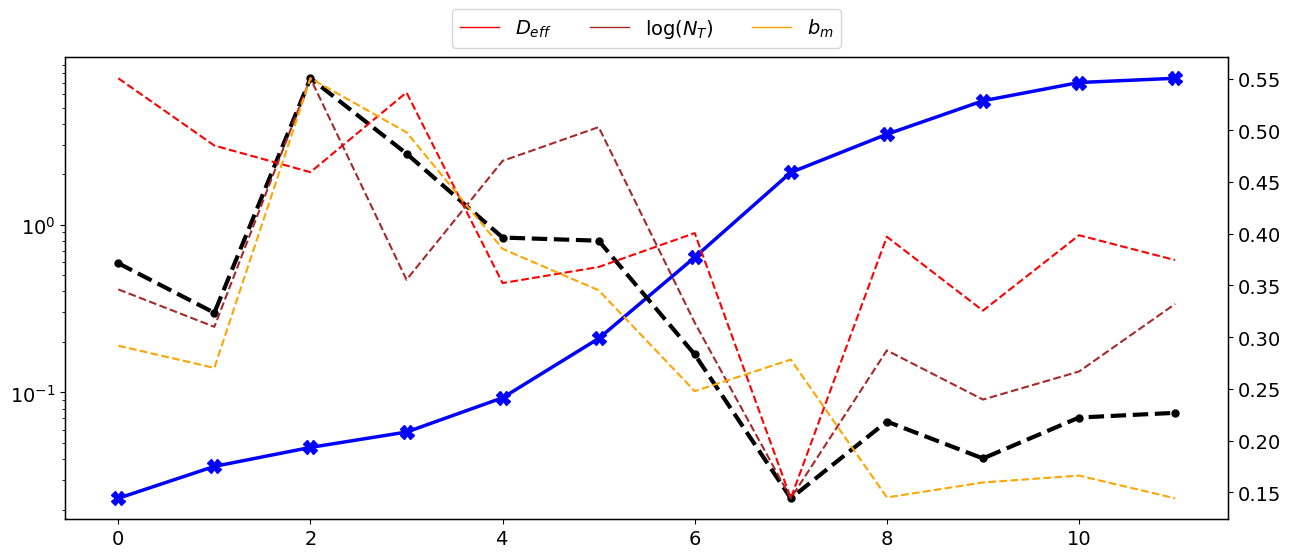

In [72]:
metric = 'ks'
vars = ['Deff','logM0', 'b_mass_size']#,'mu','beta_area_size']
# ordered_inds = np.argsort(np.mean(np.vstack((max_per_var['b_mass_size'][metric], max_per_var['Deff'][metric])),axis=0))
means_metric = np.array([max_per_var[var][metric] for var in var_list]).mean(axis=0)
means_metric1 = np.array([max_per_var[var][metric] for var in vars]).mean(axis=0)

plt.rcParams.update({'font.size': 14})

fig,ax = plt.subplots(figsize=(15,6))

ax.plot(prom_mean[ordered_inds[ordered_inds!=10]],'-X',ms=10,color='blue',lw=2.5)

# axy = ax.twinx()
# axy.plot(means[metric][ordered_inds[ordered_inds!=10]],'-o',color='k',ms=5, label=var, lw=3)
# axy.plot(means_metric[ordered_inds[ordered_inds!=10]],'-o',color='k',ms=5, label=var, lw=3)
axy = ax.twinx()
axy.plot(means_metric1[ordered_inds[ordered_inds!=10]],'--o',color='k',ms=5, label=var, lw=3)
# axy.invert_yaxis()
for var in vars:
    axy = ax.twinx()
    axy.plot(max_per_var[var][metric][ordered_inds[ordered_inds!=10]],'--',color=var_list[var]['color'],ms=10)
    axy.set_yticks([])
    # axy.invert_yaxis()

ax.set_yscale('log')

lines = [Line2D([0], [0], label=var_list[var]['title'], color=var_list[var]['color'], lw=1) for var in vars]
ax.legend(handles=lines,bbox_to_anchor = (.5,1),loc='lower center',ncol = 3)

fig.savefig('figures_small_spectra_w_peaks/prominences_%s%s.png'%(metric,suffix), bbox_inches='tight', dpi=300)


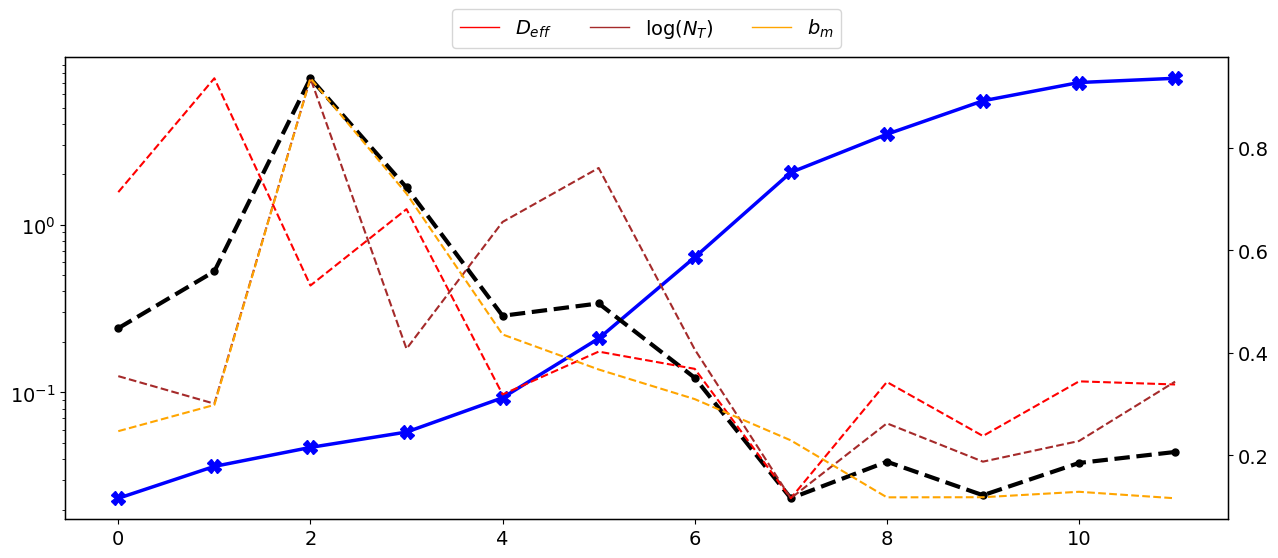

In [77]:
metric = 'entropy'
vars = ['Deff','logM0', 'b_mass_size']
# ordered_inds = np.argsort(np.mean(np.vstack((max_per_var['b_mass_size'][metric], max_per_var['Deff'][metric])),axis=0))
means_metric = np.array([max_per_var[var][metric] for var in var_list]).mean(axis=0)
means_metric1 = np.array([max_per_var[var][metric] for var in vars]).mean(axis=0)

plt.rcParams.update({'font.size': 14})

fig,ax = plt.subplots(figsize=(15,6))

ax.plot(prom_mean[ordered_inds[ordered_inds!=10]],'-X',ms=10,color='blue',lw=2.5)

axy = ax.twinx()

# axy.plot(means[metric][ordered_inds[ordered_inds!=10]],'-o',color='k',ms=5, label=var, lw=3)
axy.plot(means_metric1[ordered_inds[ordered_inds!=10]],'--o',color='k',ms=5, label=var, lw=3)
# axy.plot(means_metric[ordered_inds[ordered_inds!=10]],'-o',color='k',ms=5, label=var, lw=3)
# axy.invert_yaxis()
for var in vars:
    axy = ax.twinx()
    axy.plot(max_per_var[var][metric][ordered_inds[ordered_inds!=10]],'--',color=var_list[var]['color'],ms=10)
    axy.set_yticks([])
    # axy.invert_yaxis()
ax.set_yscale('log')
lines = [Line2D([0], [0], label=var_list[var]['title'], color=var_list[var]['color'], lw=1) for var in vars]
ax.legend(handles=lines,bbox_to_anchor = (.5,1),loc='lower center',ncol = 3)

fig.savefig('figures_small_spectra_w_peaks/prominences_%s%s.png'%(metric,suffix), bbox_inches='tight', dpi=300)


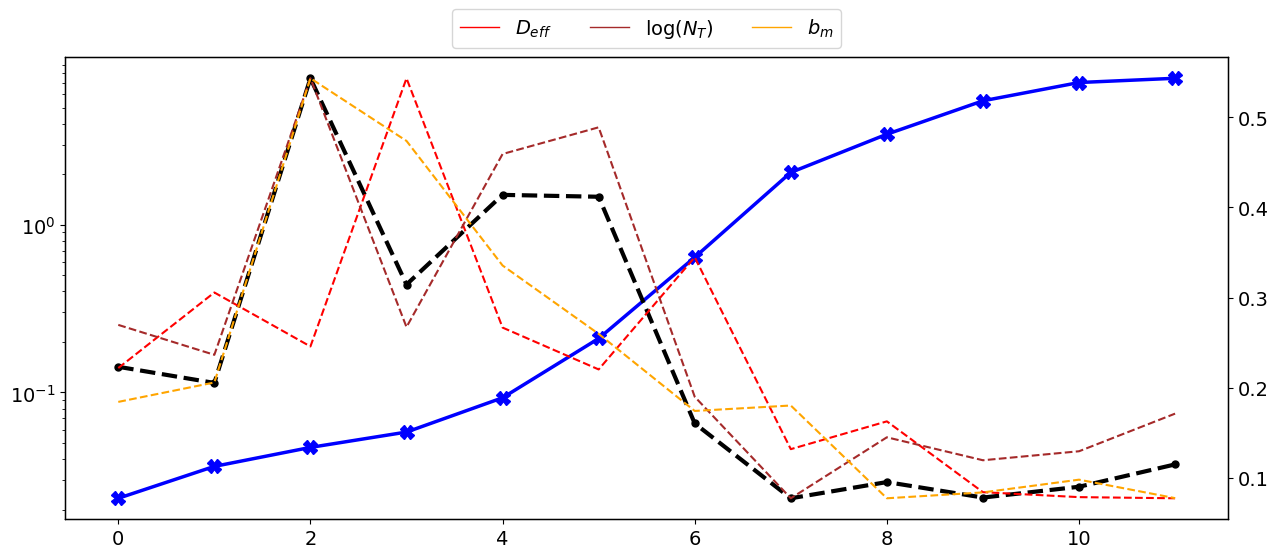

In [78]:
metric = 'wass'
vars = ['Deff','logM0', 'b_mass_size']
# ordered_inds = np.argsort(np.mean(np.vstack((max_per_var['b_mass_size'][metric], max_per_var['Deff'][metric])),axis=0))
means_metric = np.array([max_per_var[var][metric] for var in var_list]).mean(axis=0)
means_metric1 = np.array([max_per_var[var][metric] for var in vars]).mean(axis=0)

plt.rcParams.update({'font.size': 14})

fig,ax = plt.subplots(figsize=(15,6))

ax.plot(prom_mean[ordered_inds[ordered_inds!=10]],'-X',color='blue',ms=10,lw=2.5)

axy = ax.twinx()
# axy.plot(means_metric[ordered_inds[ordered_inds!=10]],'-o',color='k',ms=5, label=var, lw=3)
axy.plot(means_metric1[ordered_inds[ordered_inds!=10]],'--o',color='k',ms=5, label=var, lw=3)
# axy.plot(means[metric][ordered_inds[ordered_inds!=10]],'-o',color='k',ms=5, label=var, lw=3)
# axy.invert_yaxis()

for var in vars:
    axy = ax.twinx()
    axy.plot(max_per_var[var][metric][ordered_inds[ordered_inds!=10]],'--',color=var_list[var]['color'],ms=10)
    axy.set_yticks([])
    # axy.invert_yaxis()
ax.set_yscale('log')

lines = [Line2D([0], [0], label=var_list[var]['title'], color=var_list[var]['color'], lw=1) for var in vars]
ax.legend(handles=lines,bbox_to_anchor = (.5,1),loc='lower center',ncol = 3)

fig.savefig('figures_small_spectra_w_peaks/prominences_%s%s.png'%(metric,suffix), bbox_inches='tight', dpi=300)


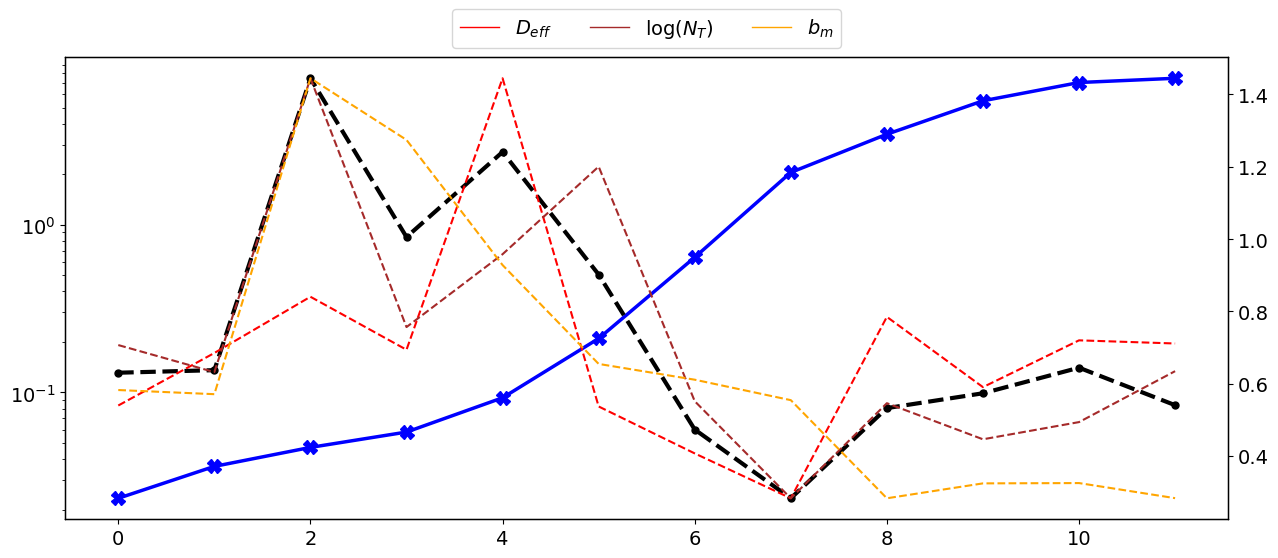

In [82]:
metric = 'wass_nor'
vars = ['Deff','logM0', 'b_mass_size']
# ordered_inds = np.argsort(np.mean(np.vstack((max_per_var['b_mass_size'][metric], max_per_var['Deff'][metric])),axis=0))
means_metric = np.array([max_per_var[var][metric] for var in var_list]).mean(axis=0)
means_metric1 = np.array([max_per_var[var][metric] for var in var_list]).mean(axis=0)

plt.rcParams.update({'font.size': 14})

fig,ax = plt.subplots(figsize=(15,6))

ax.plot(prom_mean[ordered_inds[ordered_inds!=10]],'-X',ms=10,color='blue',lw=2.5)

axy = ax.twinx()
axy.plot(means_metric1[ordered_inds[ordered_inds!=10]],'--o',color='k',ms=5, label=var, lw=3)
# axy.plot(means_metric[ordered_inds[ordered_inds!=10]],'-o',color='k',ms=5, label=var, lw=3)
# axy.plot(means[metric][ordered_inds[ordered_inds!=10]],'-o',color='k',ms=5, label=var, lw=3)
# axy.invert_yaxis()
for var in vars:
    axy = ax.twinx()
    axy.plot(max_per_var[var][metric][ordered_inds[ordered_inds!=10]],'--',color=var_list[var]['color'],ms=10)
    axy.set_yticks([])
    # axy.invert_yaxis()

ax.set_yscale('log')
lines = [Line2D([0], [0], label=var_list[var]['title'], color=var_list[var]['color'], lw=1) for var in vars]
ax.legend(handles=lines,bbox_to_anchor = (.5,1),loc='lower center',ncol = 3)

fig.savefig('figures_small_spectra_w_peaks/prominences_%s%s.png'%(metric,suffix), bbox_inches='tight', dpi=300)


In [140]:
prom_mean[ordered_inds[ordered_inds!=10]]

array([0.02334263, 0.03617632, 0.04694982, 0.05798145, 0.09285143,
       0.20963073, 0.63943539, 2.05211506, 3.46859512, 5.4884763 ,
       7.05619274, 7.48027665])

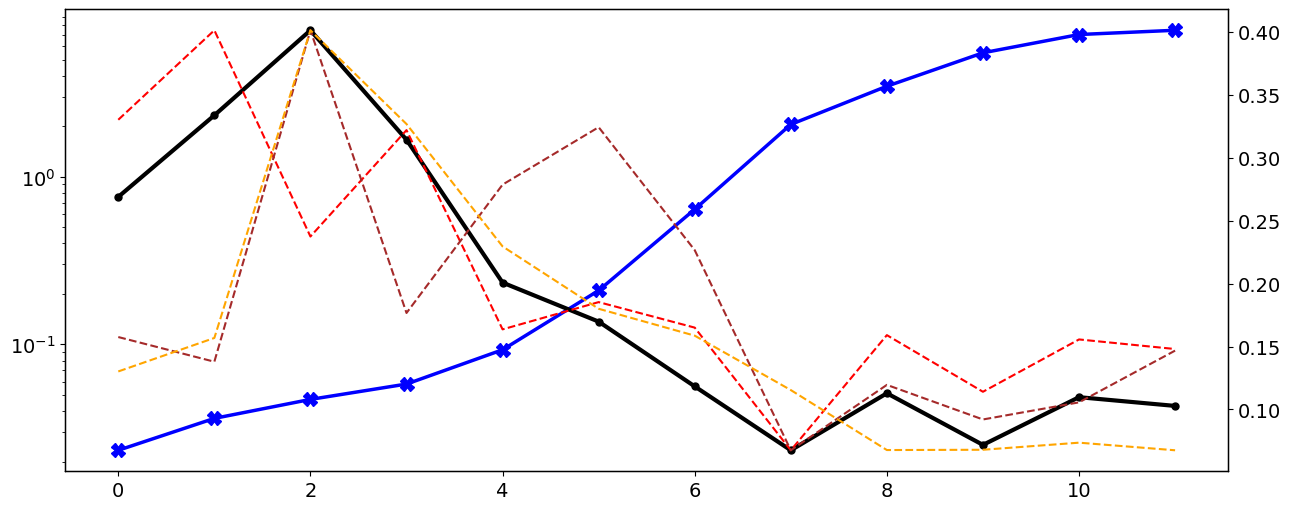

In [95]:
metric = 'bat'
vars = ['Deff','logM0', 'b_mass_size']
# ordered_inds = np.argsort(np.mean(np.vstack((min_per_var['b_mass_size'][metric], min_per_var['Deff'][metric],min_per_var['logM0'][metric])),axis=0))
# ordered_inds = np.argsort(mins[metric])
means_metric1 = np.array([min_per_var[var][metric] for var in vars]).min(axis=0)


plt.rcParams.update({'font.size': 14})

fig,ax = plt.subplots(figsize=(15,6))

ax.plot((prom_mean)[ordered_inds[ordered_inds!=10]],'-X',ms=10,lw=2.5,color='blue')

axy = ax.twinx()
# axy.plot(1-mins[metric][ordered_inds[ordered_inds!=10]],'-o',color='k',ms=5,lw=3)
axy.plot(1-means_metric1[ordered_inds[ordered_inds!=10]],'-o',color='k',ms=5,lw=3)

# axy.invert_yaxis()

for var in vars:
    axy = ax.twinx()
    axy.plot(1-min_per_var[var][metric][ordered_inds[ordered_inds!=10]],'--',color=var_list[var]['color'],ms=10, label=var)
    axy.set_yticks([])
    # axy.invert_yaxis()

ax.set_yscale('log')
fig.savefig('figures_small_spectra_w_peaks/prominences_%s%s_min.png'%(metric,suffix), bbox_inches='tight', dpi=300)


In [58]:
ordered_inds[ordered_inds!=10]

array([ 6,  1,  2,  5,  7,  8,  9, 11, 12,  4,  3,  0])

In [46]:
ordered_inds[ordered_inds!=10]

array([ 6,  2,  1,  8,  5,  4,  7,  9, 12, 11,  3,  0])

In [41]:
prom_num

array([[3.46124838, 2.69509681, 0.        ],
       [0.17394435, 0.        , 0.27015962],
       [0.        , 0.        , 0.10852895],
       [6.32380507, 7.66011566, 2.48150817],
       [5.25637656, 7.0749644 , 8.83723726],
       [0.2785543 , 0.        , 0.        ],
       [0.14084947, 0.        , 0.        ],
       [0.24363044, 0.38526174, 0.        ],
       [0.07002789, 0.        , 0.34794755],
       [1.39073628, 0.23847747, 0.35642654],
       [0.642895  , 0.81318498, 0.40756981],
       [6.93743802, 7.69816858, 7.80522335],
       [1.3209704 , 1.85036217, 7.23445278]])

In [43]:
np.median(prom_num,axis=1)

array([2.69509681, 0.17394435, 0.        , 6.32380507, 7.0749644 ,
       0.        , 0.        , 0.24363044, 0.07002789, 0.35642654,
       0.642895  , 7.69816858, 1.85036217])

In [ ]:
ordered_inds[ordered_inds!=10]

array([ 4,  3, 11, 12,  0,  9,  2,  5,  6,  1,  8,  7])

In [ ]:
skew[ordered_inds[ordered_inds!=10]]

array([[1.66561982, 1.77209424, 1.78891619],
       [1.97964423, 2.13204529, 2.17159966],
       [1.95867483, 2.10931057, 2.29864584],
       [1.67208865, 1.8148412 , 1.85101141],
       [1.87570174, 1.98266412, 2.10184222],
       [1.70228413, 1.88778598, 2.25225603],
       [1.2922337 , 1.40495787, 1.46947504],
       [1.32526371, 1.37836156, 1.44513163],
       [1.54306898, 1.60586608, 1.56031984],
       [1.21789387, 1.30401136, 1.3634873 ],
       [0.97915242, 1.02198362, 1.0280263 ],
       [1.08549248, 1.14242458, 1.06533756]])